# Kaggle:

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Practice Skills
Creative feature engineering 
Advanced regression techniques like random forest and gradient boosting
Acknowledgments
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

# Kaggle Management Problem: 

Regarding the management problem, imagine that you are advising a real estate brokerage firm in its attempt to employ machine learning methods. The firm wants to use machine learning to complement conventional methods for assessing the market value of residential real estate. Of the modeling methods examined in your study, which would you recommend to management, and why?

# Kaggle
Use many explanatory variables for your predictions. Employ at least two regression modeling methods selected from those discussed in Chapter 4 of the Géron (2017) textbook: linear regression, ridge regression, lasso regression, and elastic net. Evaluate these methods within a cross-validation design using the root mean-squared error (RMSE) as an index of prediction error.  Submit your models to Kaggle.com for evaluation on the test set.  Python scikit-learn should be your primary environment for conducting this research. Note that it is not necessary to employ polynomial regression in this assignment.

Regarding the management problem, imagine that you are advising a real estate brokerage firm in its attempt to employ machine learning methods. The firm wants to use machine learning to complement conventional methods for assessing the market value of residential real estate. Of the modeling methods examined in your study, which would you recommend to management, and why?

## Libraries

In [3]:
import pandas as pd
import seaborn as sns
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import fetch_california_housing
import datetime
import plotly.express as px


AmesData = pd.read_csv("C:/Users/bblank/Documents/Northwestern MSDS/datasets/Ames.csv")

In [4]:
AmesData.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [23]:
AmesData.YrSold.unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [3]:
AmesData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
AmesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [27]:
AmesData['Bathrooms'] = AmesData.FullBath+AmesData.HalfBath*0.5


<AxesSubplot:>

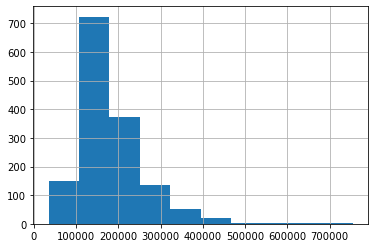

In [11]:
display(AmesData.SalePrice.hist())


<AxesSubplot:>

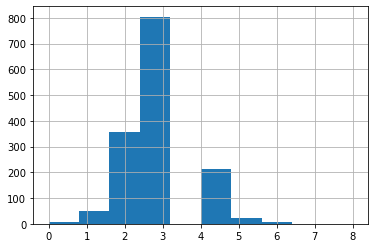

In [23]:
AmesData.BedroomAbvGr.hist()

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

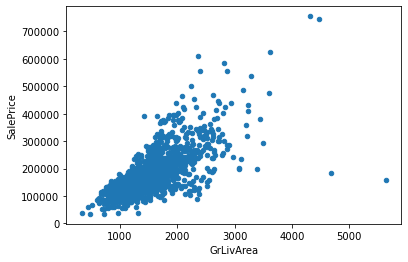

In [14]:
AmesData.plot(x='GrLivArea', y='SalePrice', kind='scatter' )

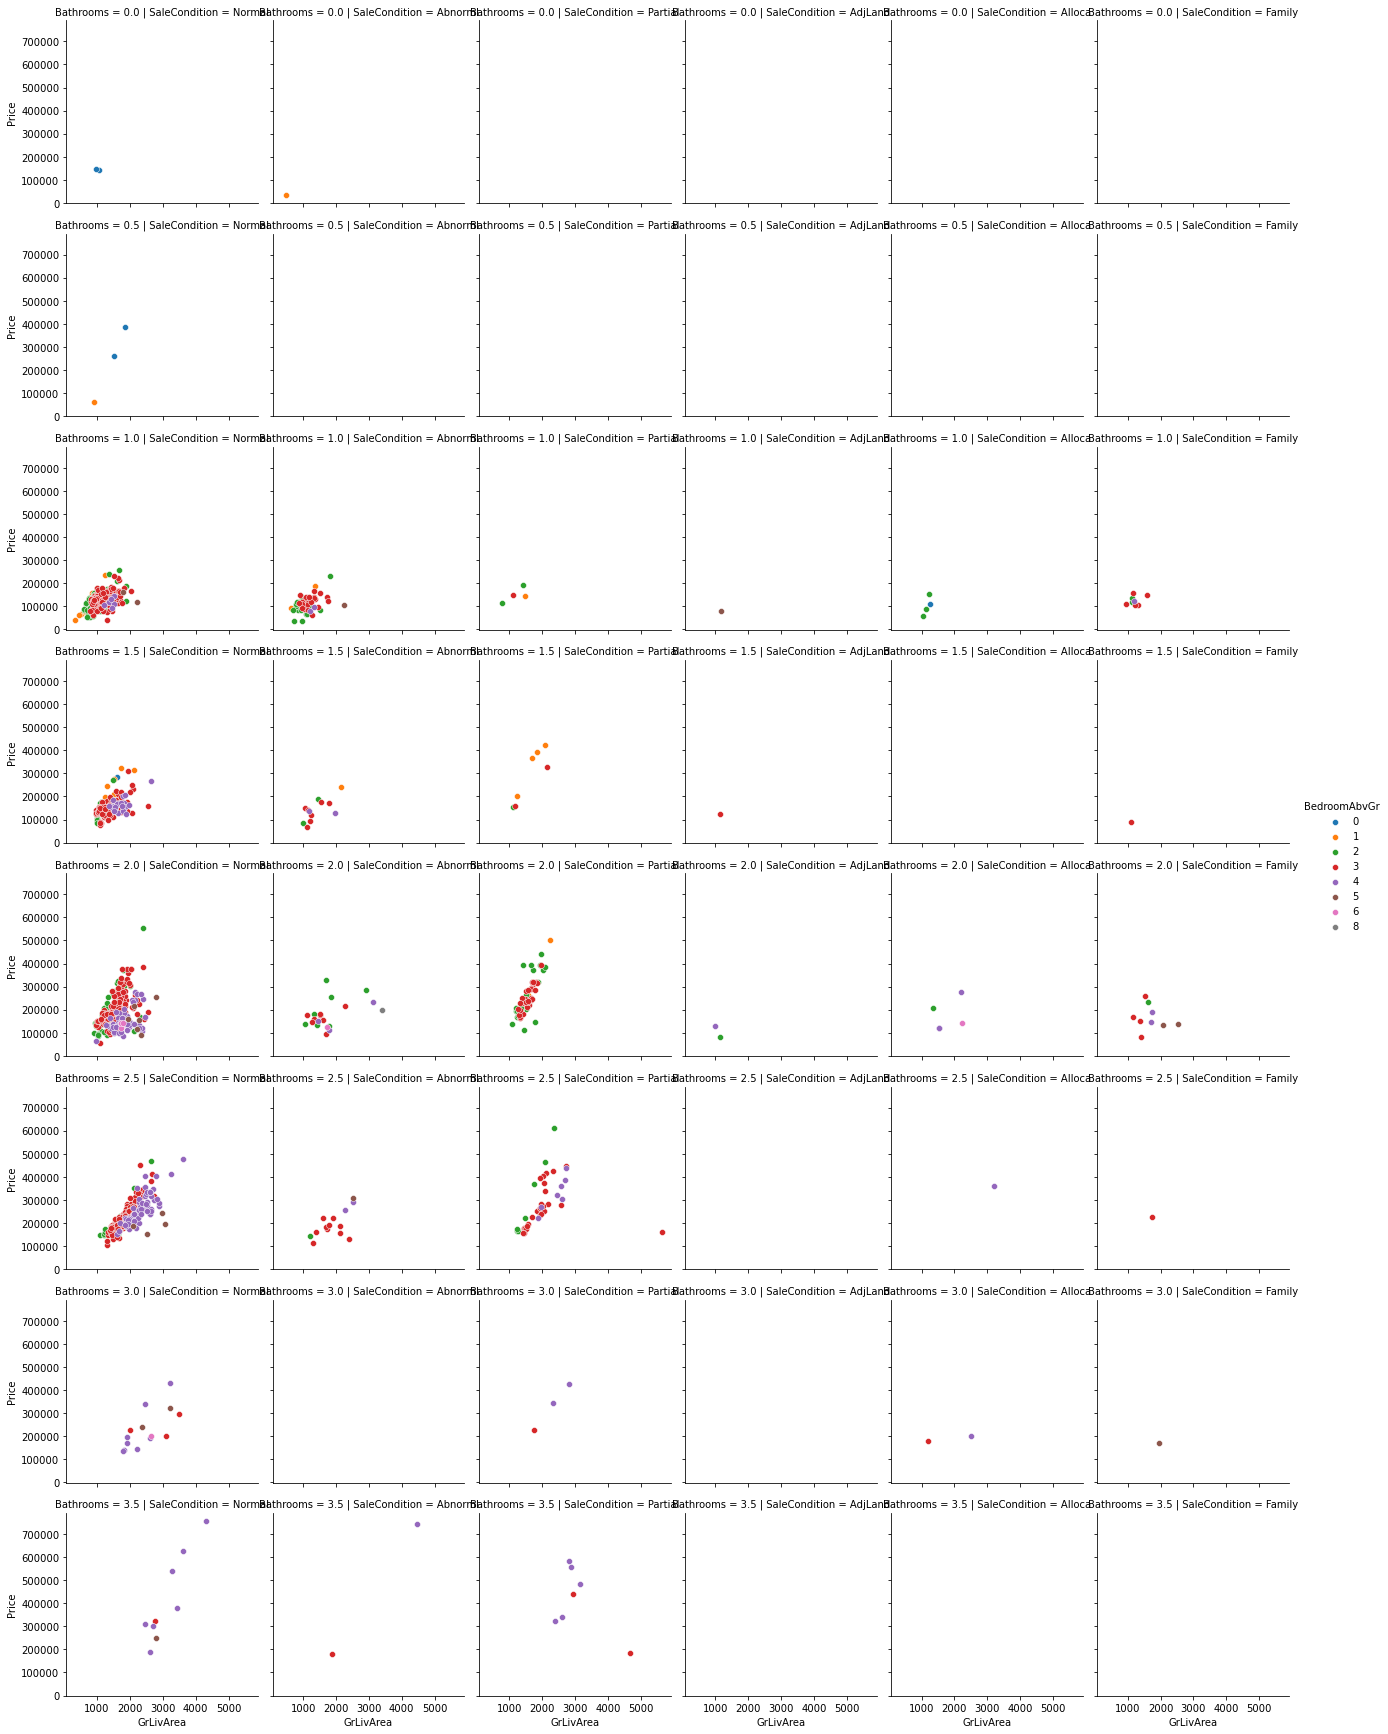

In [28]:
g = sns.FacetGrid(AmesData, col='SaleCondition',row="Bathrooms", hue = 'BedroomAbvGr')
g.map_dataframe(sns.scatterplot, x="GrLivArea", y="SalePrice")
g.set_axis_labels("GrLivArea", "Price")
g.add_legend()

In [ ]:
g = sns.FacetGrid(tips, col="time", hue="sex")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.set_axis_labels("Total bill", "Tip")
g.add_legend()

# Part II : Boston Housing

# Deliverables:

Deliverables and File Formats
Provide a double-spaced paper with a two-page maximum for the text. The paper should include all a discussion of all graded elements but focus particularly on insights. Include your Python code and output as an appendix. Upload this as a single .pdf file.